In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier



x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

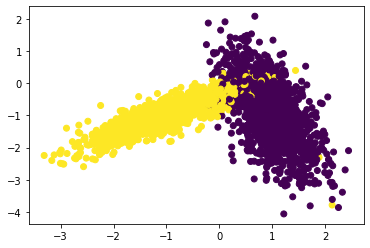

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [24]:
folds=0
param_range=(1,50)

In [25]:
def Divide_based_on_length(length,flods=4):#Return the indexes which are needed to be divided as per required folds
  each=int(length/flods)
  l=[]
  for i in range(0,length+1,each):
    l.append(i)
  #l.append(length)
  return l
print(Divide_based_on_length(10000,4))


[0, 2500, 5000, 7500, 10000]


https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/

In [26]:
def random_cv_acuuracy(X_train,Y_train,x_test,y_test,cv_x_test,cv_y_test,n):#return accuracy for test and cross validation
  sc=StandardScaler()
  x_train=sc.fit_transform(X_train)
  x_test=sc.transform(X_test)
  cv_x_test=sc.transform(cv_x_test)
  from sklearn.neighbors import KNeighborsClassifier
  classifier=KNeighborsClassifier(n_neighbors = n, p = 2,metric = 'minkowski')
  classifier.fit(X_train,Y_train)
  y_pred=classifier.predict(x_test)
  cv_y_pred=classifier.predict(cv_x_test)
  from sklearn.metrics import accuracy_score
  ac=accuracy_score(y_test,y_pred)
  ac_cv=accuracy_score(cv_y_test,cv_y_pred)
  return ac,ac_cv


In [27]:
def groups_divsion(X_train,y_train,flods):# returns list of subgroups with some groups
  l=Divide_based_on_length(len(X_train),flods=4)
  new_x_train=[]
  new_y_train=[]
  for i in range(1,len(l)):
    tempx=X_train[l[i-1]:l[i], : ]
    new_x_train.append(tempx)
    tempy=y_train[l[i-1]:l[i]]
    new_y_train.append(tempy)
  return new_x_train,new_y_train

In [28]:
def get_rando_number(a,b,l=10):
  req=[]
  while len(req)!=l:
    temp=np.random.randint(a,b)
    if temp not in req:
      req.append(temp)
  return req


In [ ]:
def RandomSearchCV(X_train,Y_train,classifier, param_range, folds):
  new_x_train,new_y_train=groups_divsion(X_train,y_train,flods)
  params=get_rando_number(param_range[0],param_range[1],10)
  params.sort()
  train_scores,test_scores=[],[]
  for k in params:
    k=int(k)
    temp_train_scores,temp_test_scores=[],[]    
    for temp in range(0,flods):
      temp_x_train=[[0,0]]
      tex=0
      temp_y_train=[]
      for i in range(flods):
        if i==temp:
          cv_x_data=new_x_train[temp]
          cv_y_data=new_y_train[temp]
        else:
          temp_x=new_x_train[i][:,:]
          temp_x_train=np.vstack((temp_x_train,temp_x))
          temp_y=new_y_train[i]
          temp_y_train.extend(temp_y)
      train_acuu,test_acuur=random_cv_acuuracy(temp_x_train[1:],temp_y_train,X_test,y_test,cv_x_data,cv_y_data,int(k))
      temp_train_scores.append(train_acuu)
      temp_test_scores.append(test_acuur)
    train_scores.append(sum(temp_train_scores)/len(temp_train_scores))
    test_scores.append(sum(temp_test_scores)/len(temp_test_scores))
  return train_scores,test_scores,params
flods=4
param_range=(1,50)
classifier=KNeighborsClassifier()
train_scores,test_scores,params=RandomSearchCV(X_train,y_train,classifier,param_range,flods)

  

In [ ]:
plt.plot(params,train_scores, label='train cruve')
plt.plot(params,test_scores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [ ]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 35)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)